# Importing libraries

In [1]:
import torch.optim as optim
from model import Model
from torchsummary import summary

from dataset import CIFAR10
from utils import get_device, visualize_data
from backprop import (
    train,
    test,
    plot_graphs,
    get_misclassified_images,
    show_misclassified_images
)

import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
data = CIFAR10()

Files already downloaded and verified
Files already downloaded and verified


# Data Transformations

In [3]:
train_loader , test_loader = data.get_loaders()

Files already downloaded and verified
Files already downloaded and verified


In [4]:
device = get_device()

Device :  cuda


In [5]:
classes = [
            "plane",
            "car",
            "bird",
            "cat",
            "deer",
            "dog",
            "frog",
            "horse",
            "ship",
            "truck",
        ]

# Visualizing the data

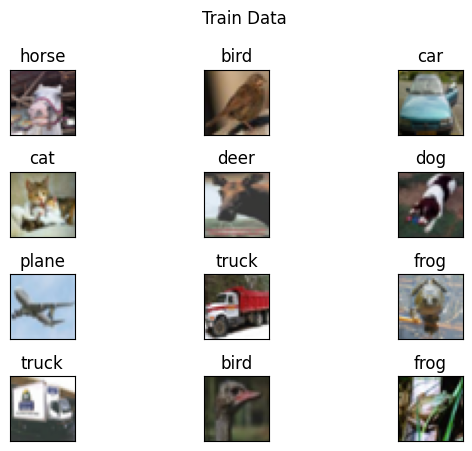

In [6]:
visualize_data(train_loader, 12, "Train Data", classes)

# The Model

In [7]:
model = Model(norm_type="group",skip=True, dropout=0.01).to(device)

# Model summary

In [8]:
summary(model,input_size = (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
         GroupNorm-2           [-1, 16, 30, 30]              32
              ReLU-3           [-1, 16, 30, 30]               0
           Dropout-4           [-1, 16, 30, 30]               0
         ConvLayer-5           [-1, 16, 30, 30]               0
            Conv2d-6           [-1, 16, 28, 28]           2,304
         GroupNorm-7           [-1, 16, 28, 28]              32
              ReLU-8           [-1, 16, 28, 28]               0
           Dropout-9           [-1, 16, 28, 28]               0
        ConvLayer-10           [-1, 16, 28, 28]               0
           Conv2d-11           [-1, 24, 28, 28]             384
        MaxPool2d-12           [-1, 24, 14, 14]               0
           Conv2d-13           [-1, 24, 14, 14]           5,184
        GroupNorm-14           [-1, 24,

# Training and Testing our Model

In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=0, verbose=True, factor=0.3)

train_losses = []
test_losses = []
train_acc = []
test_acc = []

EPOCHS = 20

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, train_losses, train_acc)
    test_loss = test(model, device, test_loader, test_losses, test_acc)
    scheduler.step(test_loss)

EPOCH: 0


Loss=1.5337727069854736 Batch_id=390 Accuracy=32.01: 100%|██████████| 391/391 [00:20<00:00, 18.65it/s]



Test set: Average loss: 1.5064, Accuracy: 4375/10000 (43.75%)

EPOCH: 1


Loss=1.4004905223846436 Batch_id=390 Accuracy=48.79: 100%|██████████| 391/391 [00:22<00:00, 17.70it/s]



Test set: Average loss: 1.2554, Accuracy: 5397/10000 (53.97%)

EPOCH: 2


Loss=1.0230624675750732 Batch_id=390 Accuracy=54.99: 100%|██████████| 391/391 [00:20<00:00, 18.78it/s]



Test set: Average loss: 1.1429, Accuracy: 5801/10000 (58.01%)

EPOCH: 3


Loss=1.0156242847442627 Batch_id=390 Accuracy=59.43: 100%|██████████| 391/391 [00:20<00:00, 19.11it/s]



Test set: Average loss: 1.1546, Accuracy: 5787/10000 (57.87%)

Epoch 00004: reducing learning rate of group 0 to 3.0000e-03.
EPOCH: 4


Loss=0.7945446372032166 Batch_id=390 Accuracy=65.09: 100%|██████████| 391/391 [00:20<00:00, 19.03it/s]



Test set: Average loss: 0.9660, Accuracy: 6545/10000 (65.45%)

EPOCH: 5


Loss=1.047375202178955 Batch_id=390 Accuracy=66.46: 100%|██████████| 391/391 [00:20<00:00, 19.16it/s]



Test set: Average loss: 0.9655, Accuracy: 6579/10000 (65.79%)

EPOCH: 6


Loss=0.893580436706543 Batch_id=390 Accuracy=67.14: 100%|██████████| 391/391 [00:20<00:00, 19.20it/s]



Test set: Average loss: 0.9379, Accuracy: 6640/10000 (66.40%)

EPOCH: 7


Loss=1.1416993141174316 Batch_id=390 Accuracy=68.25: 100%|██████████| 391/391 [00:20<00:00, 19.00it/s]



Test set: Average loss: 0.9149, Accuracy: 6756/10000 (67.56%)

EPOCH: 8


Loss=0.9761792421340942 Batch_id=390 Accuracy=68.88: 100%|██████████| 391/391 [00:21<00:00, 18.41it/s]



Test set: Average loss: 0.9055, Accuracy: 6773/10000 (67.73%)

EPOCH: 9


Loss=0.8172791600227356 Batch_id=390 Accuracy=69.65: 100%|██████████| 391/391 [00:21<00:00, 18.26it/s]



Test set: Average loss: 0.8930, Accuracy: 6801/10000 (68.01%)

EPOCH: 10


Loss=0.9239271879196167 Batch_id=390 Accuracy=70.35: 100%|██████████| 391/391 [00:21<00:00, 18.20it/s]



Test set: Average loss: 0.8529, Accuracy: 6966/10000 (69.66%)

EPOCH: 11


Loss=0.8680224418640137 Batch_id=390 Accuracy=70.89: 100%|██████████| 391/391 [00:21<00:00, 18.07it/s]



Test set: Average loss: 0.8727, Accuracy: 6935/10000 (69.35%)

Epoch 00012: reducing learning rate of group 0 to 9.0000e-04.
EPOCH: 12


Loss=0.7145540118217468 Batch_id=390 Accuracy=73.20: 100%|██████████| 391/391 [00:21<00:00, 18.46it/s]



Test set: Average loss: 0.8347, Accuracy: 7056/10000 (70.56%)

EPOCH: 13


Loss=0.9009943008422852 Batch_id=390 Accuracy=73.51: 100%|██████████| 391/391 [00:21<00:00, 18.26it/s]



Test set: Average loss: 0.8272, Accuracy: 7098/10000 (70.98%)

EPOCH: 14


Loss=0.7249571084976196 Batch_id=390 Accuracy=74.05: 100%|██████████| 391/391 [00:21<00:00, 18.19it/s]



Test set: Average loss: 0.7974, Accuracy: 7184/10000 (71.84%)

EPOCH: 15


Loss=0.6419451236724854 Batch_id=390 Accuracy=73.98: 100%|██████████| 391/391 [00:21<00:00, 18.11it/s]



Test set: Average loss: 0.7880, Accuracy: 7244/10000 (72.44%)

EPOCH: 16


Loss=0.856968104839325 Batch_id=390 Accuracy=74.44: 100%|██████████| 391/391 [00:22<00:00, 17.74it/s]



Test set: Average loss: 0.7917, Accuracy: 7204/10000 (72.04%)

Epoch 00017: reducing learning rate of group 0 to 2.7000e-04.
EPOCH: 17


Loss=0.6640428304672241 Batch_id=390 Accuracy=75.15: 100%|██████████| 391/391 [00:20<00:00, 18.93it/s]



Test set: Average loss: 0.7827, Accuracy: 7265/10000 (72.65%)

EPOCH: 18


Loss=0.7222402691841125 Batch_id=390 Accuracy=75.49: 100%|██████████| 391/391 [00:20<00:00, 18.85it/s]



Test set: Average loss: 0.7844, Accuracy: 7255/10000 (72.55%)

Epoch 00019: reducing learning rate of group 0 to 8.1000e-05.
EPOCH: 19


Loss=0.6082636117935181 Batch_id=390 Accuracy=75.65: 100%|██████████| 391/391 [00:20<00:00, 18.78it/s]



Test set: Average loss: 0.7800, Accuracy: 7290/10000 (72.90%)



# Plotting results

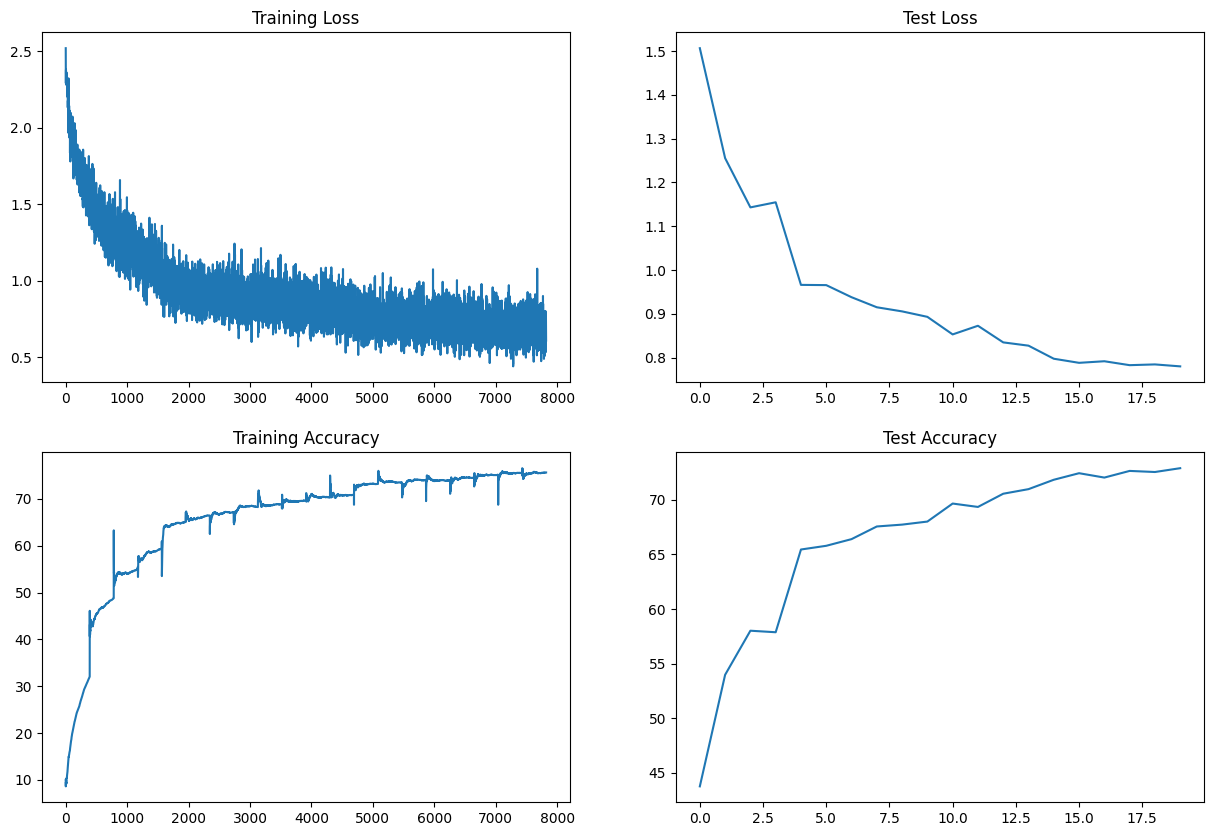

In [10]:
plot_graphs(train_losses , train_acc , test_losses , test_acc)

# Misclassified Images

In [11]:
misclassified_images, predictions, labels = get_misclassified_images(model, test_loader, device)

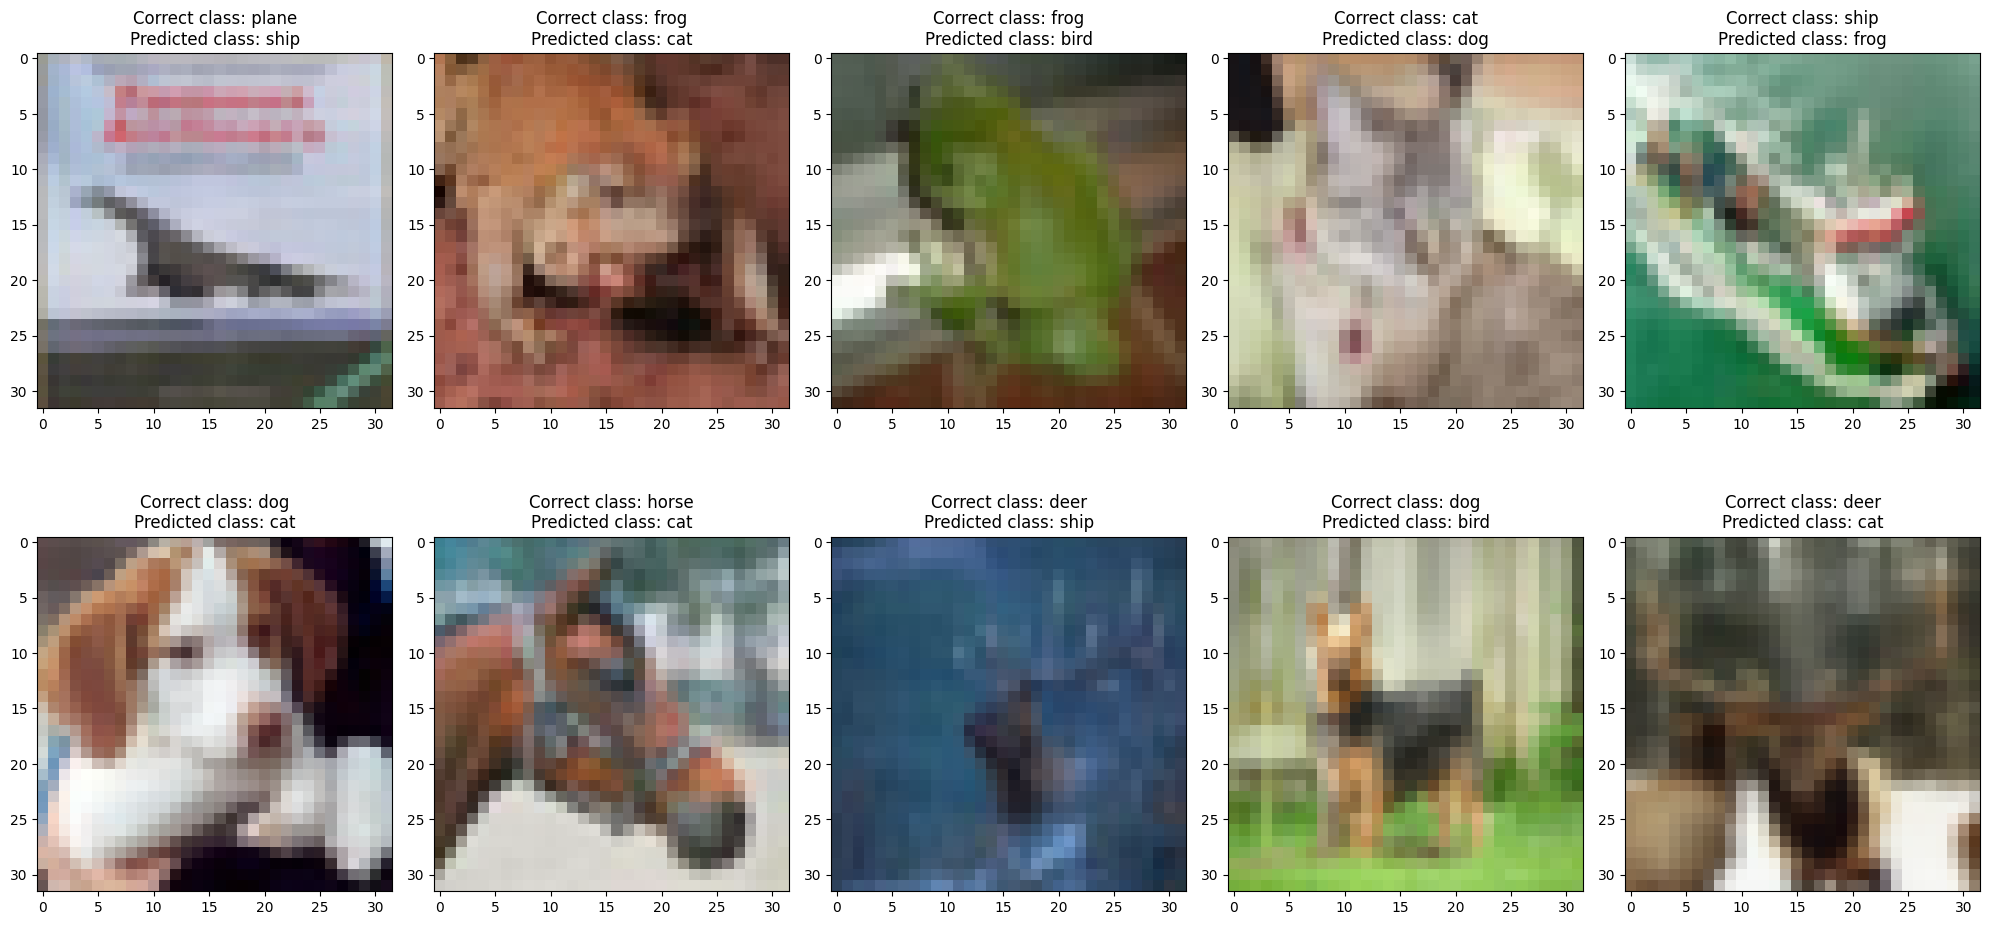

In [12]:
show_misclassified_images(
    misclassified_images[:10],
    predictions[:10],
    labels[:10],
    classes,
)